In [21]:
!pip install chardet
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import chardet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.data.path.append("/usr/share/nltk_data")

import pandas as pd
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Conv1D, MaxPooling1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Bidirectional
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import re
import tensorflow as tf
import numpy as np
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adamax 
from keras import regularizers
import ast
from keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.optimizers import Adamax
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam 
from matplotlib import pyplot as plt
import chardet
from tensorflow.keras.initializers import he_uniform

[nltk_data] Downloading package punkt to /Users/wenxiu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/wenxiu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wenxiu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/wenxiu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
data = pd.read_csv('/Users/wenxiu/Documents/GitHub/CZ4034-Information-Retrieval-Grp-28/data/processed/combined_vader_textblob_classified_data.csv', encoding="ISO-8859-1")
data

/var/folders/n8/3f_jyqrd5r97gbpz42mt5mn00000gn/T/ipykernel_73941/2696913460.py:1: DtypeWarning: Columns (1,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/wenxiu/Documents/GitHub/CZ4034-Information-Retrieval-Grp-28/data/processed/combined_vader_textblob_classified_data.csv', encoding="ISO-8859-1")


,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,...,vader_preprocessing_text,vader_neg,vader_neu,vader_pos,vader_comp,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
0,G_F758,False,343,Hogwarts Legacy Flight the Good Flight (SILVER...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.674,0.326,0.4404,1,0.600000,0.700000,1,0.0
1,DeVinSimmons,False,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],...,oh and how smooth getting on and off the broom...,0.000,1.000,0.000,0.0000,0,0.500000,0.400000,1,0.0
2,cozzboz,False,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],...,playing endless hours of got me in the mood f...,0.000,0.904,0.096,0.2023,1,0.575000,-0.062500,-1,0.0
3,Fantastic_4ork,False,486,Hey #AvalancheSoftware how about that #photomo...,15/2/2023 19:24,0,0,3.0,https://twitter.com/Fantastic_4ork/status/1625...,"['AvalancheSoftware', 'photomode', 'hogwartsle...",...,hey how about that for ? adegaa$?a*adegaaa ...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
4,jordan_sebas2,False,487,Hogwarts Legacy Flight the Good Flight (SILVER...,15/2/2023 19:57,0,0,0.0,https://twitter.com/jordan_sebas2/status/16259...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.530,0.470,0.7964,1,0.533333,0.266667,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79545,Abfun77,False,382,Video of ELDEN RING: All Quests in Order + Mis...,22/2/2023 0:17,0,7,79.0,https://twitter.com/Abfun77/status/16281871857...,"['ELDENRING', 'ELDEN_RING', 'guide', 'gaming',...",...,video of elden ring: all quests in order + mis...,0.000,1.000,0.000,0.0000,0,0.767857,0.142857,1,0.0
79546,Vivern96,False,7,Red Wolf of Radagon RL1 NoHit #ELDEN_RING #ELD...,16/6/2022 14:29,0,0,1.0,https://twitter.com/Vivern96/status/1537442134...,"['ELDEN_RING', 'ELDENRING', 'gaming', 'game']",...,red wolf of radagon rl1 nohit,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79547,EllieCupcakes,False,263,Fanart of Miruku with her Apostle (Slim) and M...,3/3/2023 21:01,1,7,32.0,https://twitter.com/EllieCupcakes/status/16317...,"['EldenRing', 'EldenRingArt']",...,fanart of miruku with her apostle (slim) and m...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79548,Pinknotess,False,0,This comic is definitely worth reading! Come c...,19/3/2023 3:42,0,0,0.0,https://twitter.com/Pinknotess/status/16372984...,"['EldenRing', 'illusrtationart', 'Romance']",...,this comic is definitely worth reading! come c...,0.000,0.607,0.393,0.6351,1,0.300000,0.359375,1,1.0


In [23]:
data['processed'] = data['processed'].apply(ast.literal_eval)
data['use_col'] = data['processed'].apply(lambda x: ' '.join(x))

In [24]:
data['TextBlob_Polarity'] = data['TextBlob_Polarity'].astype(np.float32)
data['TextBlob_Subjectivity'] = data['TextBlob_Subjectivity'].astype(np.float32)

In [25]:
data['use_col']

0        hogwarts legacy flight the good flight silver ...
1            oh and how smooth get on and off the broom be
2        play endless hours of get me in the mood for s...
3                        hey how about that for d d 1 2aai
4        hogwarts legacy flight the good flight silver ...
                               ...                        
79545    video of elder ring all quest in order disable...
79546     red wolf of dragon rl1 not https t co avnntrkqdo
79547    apart of miruku with her apostle slim and miru...
79548    this comic be definitely worth read come check...
79549    new video be out now d who the judge be this m...
Name: use_col, Length: 79550, dtype: object

In [26]:
X = data[['TextBlob_Polarity', 'TextBlob_Subjectivity', 'use_col']]
labels = data['final_class']

labels = tf.keras.utils.to_categorical(labels, 3, dtype="float32")
tokenizer = Tokenizer(num_words=30000, split=' ')
tokenizer.fit_on_texts(data['use_col'].values)
maxlen=200

X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

X1_train = tokenizer.texts_to_sequences(X_train['use_col'].values)
X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)

X1_test = tokenizer.texts_to_sequences(X_test['use_col'].values)
X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)


In [27]:
X2_train = X_train[['TextBlob_Polarity', 'TextBlob_Subjectivity']].values
X2_test = X_test[['TextBlob_Polarity', 'TextBlob_Subjectivity']].values

In [28]:
print(X1_train.shape)
print(X1_test.shape)
print(X2_train.shape)
print(X2_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(63640, 200)
(15910, 200)
(63640, 2)
(15910, 2)
(63640, 3)
(15910, 3)


In [29]:
X1_train

array([[   6,  213,  374, ...,    0,    0,    0],
       [ 961, 1370,  215, ...,    0,    0,    0],
       [  13,  350,   14, ...,    0,    0,    0],
       ...,
       [   4,   94,  176, ...,    0,    0,    0],
       [  46,   57,  137, ...,    0,    0,    0],
       [  46,   57,  385, ...,    0,    0,    0]], dtype=int32)

In [30]:
from keras.layers import Concatenate
from keras.models import Model, Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping

model1_in = Input(shape=(maxlen,))

embedding_layer = Embedding(input_dim=30000, output_dim=40, input_length=X1_train.shape[1])(model1_in)
dropout_1 = Dropout(0.7)(embedding_layer)
bilstm_1 = Bidirectional(LSTM(units=128, return_sequences=True, kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))(embedding_layer)
dropout_2 = Dropout(0.7)(bilstm_1)
model1_out = Bidirectional(LSTM(units=64, return_sequences=False, kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))(dropout_2)

model2_in = Input(shape=(2,))
model2_out = Dense(10, activation='relu')(model2_in)

concat_layer = Concatenate()([model1_out, model2_out])
dense_layer_3 = Dense(10, activation='relu')(concat_layer)
output = Dense(3, activation='softmax')(dense_layer_3)
model = Model(inputs=[model1_in, model2_in], outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)



In [7]:
# from keras.callbacks import EarlyStopping

# model_dropout = Sequential()

# model_dropout.add(Embedding(input_dim=30000, output_dim=40, input_length=X.shape[1]))
# model_dropout.add(Dropout(0.7))
# model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=True, kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01))))
# model_dropout.add(Dropout(0.7))
# model_dropout.add(Bidirectional(LSTM(units=64, return_sequences=False, kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01))))
# model_dropout.add(Dense(3, activation='softmax'))

# optimizer = Adamax(lr=0.01)
# model_dropout.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

# print(model_dropout.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 103, 40)           1200000   
                                                                 
 dropout (Dropout)           (None, 103, 40)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 103, 256)         173056    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 103, 256)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 3)                 3

/Users/wenxiu/miniconda3/envs/info-ret/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adamax.py:99: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [31]:
history = model.fit(x=[X1_train, X2_train], y=[Y_train,Y_train], epochs = 100, batch_size=256, validation_data=([X1_test, X2_test] , [Y_test, Y_test]), callbacks=[early_stopping])

Epoch 1/100
249/249 [==============================] - 362s 1s/step - loss: 11.3295 - categorical_accuracy: 0.6782 - val_loss: 2.9444 - val_categorical_accuracy: 0.7946
Epoch 2/100
249/249 [==============================] - 357s 1s/step - loss: 1.5224 - categorical_accuracy: 0.7740 - val_loss: 0.7848 - val_categorical_accuracy: 0.7941
Epoch 3/100
249/249 [==============================] - 377s 2s/step - loss: 0.5744 - categorical_accuracy: 0.8372 - val_loss: 0.5471 - val_categorical_accuracy: 0.8272
Epoch 4/100
249/249 [==============================] - 381s 2s/step - loss: 0.4327 - categorical_accuracy: 0.8730 - val_loss: 0.5118 - val_categorical_accuracy: 0.8375
Epoch 5/100
249/249 [==============================] - 354s 1s/step - loss: 0.3639 - categorical_accuracy: 0.8934 - val_loss: 0.5314 - val_categorical_accuracy: 0.8285
Epoch 6/100
249/249 [==============================] - 349s 1s/step - loss: 0.3395 - categorical_accuracy: 0.9015 - val_loss: 0.5269 - val_categorical_accuracy

In [32]:
from sklearn.metrics import f1_score, classification_report

# Get the predicted probabilities on the test set
y_pred_prob = model.predict([X1_test, X2_test])

# Convert the predicted probabilities to integer class labels
y_pred = y_pred_prob.argmax(axis=-1)

# Convert the one-hot encoded labels to integers
y_true = Y_test.argmax(axis=-1)
report = classification_report(y_true, y_pred, target_names=['-1','0','1'])
print(report)

498/498 [==============================] - 36s 70ms/step
              precision    recall  f1-score   support

          -1       0.90      0.82      0.86      6017
           0       0.81      0.84      0.83      5511
           1       0.79      0.86      0.83      4382

    accuracy                           0.84     15910
   macro avg       0.84      0.84      0.84     15910
weighted avg       0.84      0.84      0.84     15910



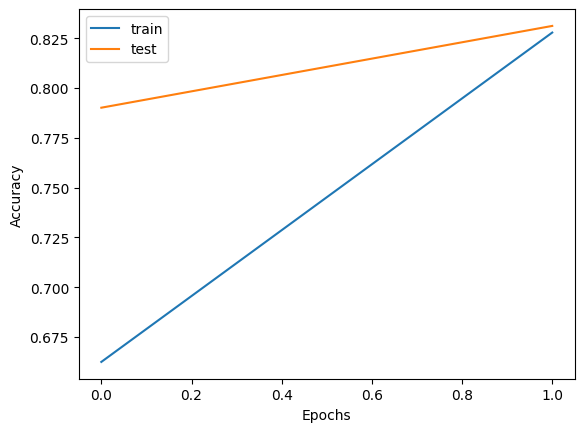

In [15]:
# Plotting the accuracies
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('./overall_acc.png')

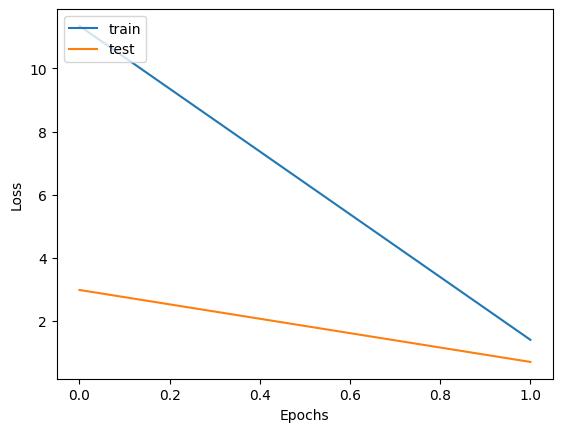

In [16]:
# Plotting the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('./overall_loss.png')

In [20]:
from sklearn.metrics import f1_score

# Get the predicted probabilities on the test set
y_pred_prob = model.predict([X1_test, X2_test])

# Convert the predicted probabilities to integer class labels
y_pred = y_pred_prob.argmax(axis=-1)

# Convert the one-hot encoded labels to integers
y_true = Y_test.argmax(axis=-1)

# Calculate the F1 score
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 score:", f1)

498/498 [==============================] - 59s 118ms/step
F1 score: 0.8289147874572564
